<a href="https://colab.research.google.com/github/riinndescartes/Machine-Learning/blob/main/Pt2_Praktikum_LinearRegression_Catherine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pertanyaan**

###**Soal 1** - Memperbaiki Error Tahap `Data Preprocessing`

####**1.a. Kenapa warning di atas muncul?**


Peringatan `FutureWarning` tersebut muncul karena program mencoba menetapkan nilai bertipe `float64` (hasil dari scaler.fit_transform()) ke kolom yang kemungkinan awalnya memiliki tipe data `int64`. Pandas tidak mengizinkan secara langsung mengubah tipe data dari `int64` ke `float64` tanpa konversi eksplisit, karena ini bisa menyebabkan masalah di masa mendatang.

Ini terjadi karena kolom-kolom yang ditransformasikan (living_in_m2 dan real_bathrooms) mungkin memiliki tipe data `int64` dari awalnya, sementara hasil dari StandardScaler adalah `float64`. Oleh karena itu, Pandas memperingatkan Anda bahwa operasi ini mungkin tidak aman, dan di versi mendatang, itu bisa menyebabkan kesalahan (error).

Solusi:
Kita perlu mengonversi kolom-kolom yang akan dinormalisasi ke tipe data `float64` sebelum melakukan transformasi.

####**1.b. Buatkan code perbaikan!**

Berikut ini saya sertakan code perbaikannya, yaitu dengan menambahkan `pd.options.mode.copy_on_write = True `dan mengonversi tipe data fitur `living_in_m2` sebelum dilakukan transformasi standar scaler (standarisasi data) agar tipe datanya seragam dengan fitur lainnya.

Penambahan `pd.options.mode.copy_on_write = True ` pada program didasarkan pada saran evaluasi dari [dokumentasi berikut](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy), yang membahas mengenai "Masalah urutan evaluasi". Copy-on-Write akan menjadi default baru di pandas 3.0. Ini berarti daripada pengindeksan berantai akan tidak pernah bekerja. Akibatnya, tidak akan diperlukan lagi. Lihat bagian ini untuk konteks lebih lanjut. Dokumentasi merekomendasikan untuk mengaktifkan `Copy-on-Write` untuk memanfaatkan peningkatan dengan `SettingWithCopyWarning`.

` pd.options.mode.copy_on_write = True `

Saat kita menggunakan pengindeksan berantai, urutan dan jenis operasi pengindeksan menentukan sebagian apakah hasilnya adalah irisan ke dalam objek asli, atau salinan irisan. Pandas punya karena menetapkan salinan slice seringkali tidak disengaja, tetapi kesalahan yang disebabkan oleh pengindeksan berantai mengembalikan salinan di mana irisan diharapkan `SettingWithCopyWarning`.

Jika kita ingin panda kurang lebih mempercayai penugasan ke ekspresi pengindeksan berantai, kita dapat mengatur opsi ke salah satu nilai berikut: `mode.chained_assignment`.

- `warn`, default, berarti a dicetak.  `SettingWithCopyWarning`

- `raise` berarti panda akan membesarkan yang harus kita hadapi. `SettingWithCopyError`

- `None` akan menekan peringatan sepenuhnya.

Berikut adalah code perbaikannya:

  
    import numpy as np

    from sklearn.preprocessing import StandardScaler

    pd.options.mode.copy_on_write = True

    def preprocess_data(df):
    #konversi tipe data boolean menjadi integer
    df['has_basement'] = df['has_basement'].astype(int)
    df['renovated'] = df['renovated'].astype(int)
    df['nice_view'] = df['nice_view'].astype(int)
    df['perfect_condition'] = df['perfect_condition'].astype(int)
    df['has_lavatory'] = df['has_lavatory'].astype(int)
    df['single_floor'] = df['single_floor'].astype(int)


    features = ['bedrooms', 'grade', 'has_basement', 'living_in_m2',
                'renovated', 'nice_view', 'perfect_condition', 'real_bathrooms',
                'has_lavatory', 'single_floor', 'month', 'quartile_zone']

    X = df[features]
    y = df['price']

    # konversi kolom yang relevan dengan int64 sebelum penyekalaan
    X.loc[:, 'living_in_m2'] = X['living_in_m2'].astype(np.int64)
    X.loc[:, 'real_bathrooms'] = X['real_bathrooms'].astype(np.int64)


    # normalisasi fitur numerik
    scaler = StandardScaler()
    X[['living_in_m2','real_bathrooms']] = scaler.fit_transform(X[['living_in_m2','real_bathrooms']])

    return X, y
    
    # olah training dan test data
    X_train, y_train = preprocess_data(df_train)
    X_test, y_test = preprocess_data(df_test)


###**Soal 2** - MSE


Jika hanya dilihat dari grafik hasilnya memang cukup baik tapi saat melihat nilai MSE hasilnya sangat besar. Kenapa MSE besar tapi plot terlihat baik?

Grafik tersebut memberikan gambaran umum dari seberapa baik model bekerja secara visual, tetapi *MSE* memberikan gambaran lebih mendetail tentang **rata-rata kuadrat kesalahan**, yang sangat **sensitif** terhadap outlier dan nilai ekstrem. Meskipun plot terlihat bagus, beberapa kesalahan besar atau skala besar dari target dapat menyebabkan MSE yang besar.

Fenomena yang terjadi saat plot **Actual vs Predicted Prices** terlihat baik, namun **Mean Squared Error (MSE)** menunjukkan nilai yang besar, dapat disebabkan oleh beberapa faktor berikut:

1. **Skala Data yang Luas** (Outliers atau Variasi Besar)
   - Jika data memiliki **rentang nilai yang sangat luas** atau terdapat **outlier** (nilai ekstrim yang sangat besar atau sangat kecil dibandingkan dengan data lain), maka perbedaan kecil antara nilai aktual dan prediksi pada titik tertentu dapat menyebabkan **MSE menjadi besar**.
   - **MSE** dihitung sebagai rata-rata dari kuadrat selisih antara prediksi dan nilai aktual, sehingga **kesalahan besar pada beberapa titik** (outlier) dapat memperbesar MSE secara signifikan, meskipun pada sebagian besar data, prediksi tampak baik (seperti yang terlihat di plot).
   
  **Contoh**:
   - Jika sebagian besar titik prediksi mendekati garis diagonal, tetapi beberapa titik yang memiliki harga sangat tinggi atau rendah (outliers) memiliki prediksi yang jauh dari harga aktual, maka MSE akan menjadi besar.

2. **Skala Besar pada Nilai Target (Harga)**  
   - Jika variabel target (`price`) memiliki skala yang besar (misalnya harga properti dalam ratusan ribu hingga jutaan), meskipun prediksi dan nilai aktual cukup dekat secara relatif, **selisih absolut yang kecil pada nilai besar** tetap menghasilkan MSE yang tinggi.
   - Misalnya, perbedaan 100.000 pada sebuah properti bernilai 1 juta mungkin terlihat kecil secara visual, namun kuadrat dari kesalahan sebesar itu akan memberikan kontribusi besar terhadap MSE.

  **Contoh**:
   - Jika prediksi harga adalah 1.000.000 dan nilai aktual adalah 1.050.000, selisihnya 50.000. Saat dikuadratkan, ini menghasilkan 2.5 miliar. Nilai ini cukup besar meskipun secara visual mungkin tidak terlalu terlihat jauh.

3. **Distribusi Kesalahan yang Tidak Merata**
   - Kesalahan (error) antara nilai aktual dan prediksi mungkin tidak terdistribusi secara merata. Plot *Actual vs Predicted Prices* memberikan gambaran keseluruhan, tetapi **kesalahan besar bisa terkonsentrasi di sebagian kecil data** (misalnya pada rentang harga tertentu). Hal ini dapat menyebabkan plot terlihat "baik" secara umum, tetapi MSE terpengaruh oleh kesalahan besar tersebut.
   
  **Contoh**:
   - Sebagian besar prediksi mungkin tepat untuk harga-harga menengah, tetapi terdapat kesalahan besar pada prediksi harga properti yang lebih tinggi atau lebih rendah.

4. **Pengaruh Kuadrat pada MSE**
   - MSE menghitung kesalahan dalam bentuk kuadrat, sehingga **kesalahan yang lebih besar memiliki dampak yang jauh lebih signifikan** pada MSE dibandingkan kesalahan kecil. Jika terdapat beberapa prediksi yang sangat meleset, kesalahan besar ini akan dikuadratkan, menyebabkan peningkatan besar dalam nilai MSE meskipun sebagian besar prediksi mendekati nilai aktual.

  **Contoh**:
   - Jika ada beberapa prediksi yang jauh dari nilai aktual (misalnya, meleset 100.000 atau lebih), saat dikuadratkan, kesalahan tersebut akan menghasilkan angka yang sangat besar (10 miliar atau lebih), yang secara dramatis meningkatkan MSE.

###**Soal 3** - Perbaikan Model

*) Pengerjaan terlampir pada baris kode model kedua.

💡 Untuk memperbaiki model di atas lakukan:
1. Pemilihan Fitur: Gunakan teknik pemilihan fitur untuk mengidentifikasi fitur yang paling relevan dan mengurangi kompleksitas model.

2. Regularisasi: Pertimbangkan untuk menambahkan regularisasi (seperti Lasso atau Ridge) untuk mengurangi risiko overfitting.

- Saya akan menggunakan Statistik Deskriptif, Box-Plot, dan Skewness Curve untuk melihat keadaan dataset training apakah ada outlier, rentang nilai yang terlalu jauh dan sebagainya di tahap **Data Preprocessing**

- Jika outlier ditemukan maka saya akan menyikapi outlier tersebut dari sudut pandang Statistika Robust untuk meningkatkan akurasi model dengan menggunakan metode IQR di tahap **Data Preprocessing**

- Kemudian saya menambahkan baris kode metode Standarisasi dataset training yang telah diperbaiki ( **Standar Scaler** ) di tahap **Data Preprocessing**.

- Pada bagian akhir perbaikan model saya akan mengevaluasi kinerja model menggunakan R2 Score, Mean Square Error dan Mean Absolute Error di tahap **Evaluating the Model**.


###**Soal 4** - Interpretasi Model Kedua Setelah Perbaikan

*) Pengerjaan terlampir pada baris kode model kedua.


#**Model Kedua Setelah Perbaikan**

##Import Libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Load and Understand the Data

In [ ]:
# Load the datasets
df_train = pd.read_csv('df_train.csv')
df_test = pd.read_csv('df_test.csv')

df_train.info(), df_test.info()

# Display the first few rows of each dataframe to understand their structure
df_train.head(), df_test.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14105 entries, 0 to 14104
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               14105 non-null  object 
 1   price              14105 non-null  float64
 2   bedrooms           14105 non-null  int64  
 3   grade              14105 non-null  int64  
 4   has_basement       14105 non-null  bool   
 5   living_in_m2       14105 non-null  float64
 6   renovated          14105 non-null  bool   
 7   nice_view          14105 non-null  bool   
 8   perfect_condition  14105 non-null  bool   
 9   real_bathrooms     14105 non-null  int64  
 10  has_lavatory       14105 non-null  bool   
 11  single_floor       14105 non-null  bool   
 12  month              14105 non-null  int64  
 13  quartile_zone      14105 non-null  int64  
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 964.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

(         date      price  bedrooms  grade  has_basement  living_in_m2  \
 0  2014-06-20   237000.0         3      7         False     120.77390   
 1  2015-04-20  1328000.0         5      9          True     310.29602   
 2  2014-08-13   790500.0         4      9         False     311.22505   
 3  2015-04-08   431000.0         4      9         False     282.42512   
 4  2015-02-11   199000.0         3      7          True     162.58025   
 
    renovated  nice_view  perfect_condition  real_bathrooms  has_lavatory  \
 0      False      False              False               1         False   
 1       True       True              False               3         False   
 2      False      False              False               2          True   
 3      False      False              False               2          True   
 4      False      False              False               2          True   
 
    single_floor  month  quartile_zone  
 0          True      6              2  
 1      

## Mengukur Statistik Deskriptif Dataset Training

Perbaikan dimulai dari tahap `Data Preprocessing` dengan mengukur Statistik Deskriptif dataset training. Pada tahap ini kita memetakan dataset training berdasarkan ukuran dispersi dataset agar kita bisa mendapatkan informasi dari nilai Rata-Rata, Standar Deviation, Minimal, Maksimal, Modus, Median, IQR dan Maksimal-nya.

💡Baris kode `df_train.describe()` ini sebenarnya ditempatkan setelah baris kode `Load and Understanding Data`.

In [ ]:
df_train.describe()

,price,bedrooms,grade,living_in_m2,real_bathrooms,month,quartile_zone
count,1.410500e+04,14105.000000,14105.000000,14105.000000,14105.000000,14105.000000,14105.000000
mean,4.998219e+05,3.339171,7.593407,187.540971,1.707409,6.603828,2.467990
std,2.457127e+05,0.880132,1.092411,76.273966,0.685596,3.116637,1.087813
min,7.800000e+04,0.000000,1.000000,26.941870,0.000000,1.000000,1.000000
25%,3.190000e+05,3.000000,7.000000,130.993230,1.000000,4.000000,2.000000
50%,4.435000e+05,3.000000,7.000000,174.657640,2.000000,6.000000,2.000000
75%,6.250000e+05,4.000000,8.000000,231.328470,2.000000,9.000000,3.000000
max,1.485000e+06,7.000000,12.000000,694.914440,6.000000,12.000000,4.000000


💡 Pada bagian interpretasi data deskriptif ini akan difokuskan pada deteksi outlier menggunakan metode statistik **Robust** dengan estimator **Interquartile Range (IQR)**.

**IQR** adalah selisih antara kuartil ketiga (Q3) dan kuartil pertama (Q1), yang dapat digunakan untuk mengidentifikasi outlier. Data di luar batas **Lower Bound** (Q1 - 1.5 * IQR) dan **Upper Bound** (Q3 + 1.5 * IQR) dianggap sebagai outlier.

Berikut interpretasi dari masing-masing kolom datanya:

1. **Price (Harga)**
   - **IQR** untuk harga adalah 625,000 - 319,000 = 306,000.
   - Batas bawah: 319,000 - 1.5 * 306,000 = -140,000 (tidak ada harga negatif, sehingga kita hanya mempertimbangkan batas bawah sebagai 0).
   - Batas atas: 625,000 + 1.5 * 306,000 = 1,084,000.
   - Harga maksimal sebesar 1,485,000, jauh di atas batas atas, menunjukkan adanya outlier harga tinggi. Properti dengan harga sangat tinggi ini dapat memengaruhi model jika tidak ditangani.

2. **Bedrooms (Jumlah Kamar Tidur)**
   - **IQR** untuk kamar tidur adalah 4 - 3 = 1.
   - Batas bawah: 3 - 1.5 * 1 = 1.5 (dibulatkan menjadi 1, karena jumlah kamar tidur tidak bisa pecahan).
   - Batas atas: 4 + 1.5 * 1 = 5.5 (dibulatkan menjadi 5).
   - Nilai maksimal (7) berada di atas batas atas, menunjukkan bahwa ada outlier berupa jumlah kamar tidur yang sangat tinggi dibandingkan properti lainnya.

3. **Grade (Kualitas Bangunan)**
   - **IQR** untuk grade adalah 8 - 7 = 1.
   - Batas bawah: 7 - 1.5 * 1 = 5.5.
   - Batas atas: 8 + 1.5 * 1 = 9.5.
   - Grade maksimal (12) berada di atas batas atas, menunjukkan adanya outlier pada kualitas bangunan yang sangat tinggi, yang bisa menjadi properti premium dan mungkin tidak representatif untuk analisis umum.

4. **Living Area (Luas Bangunan dalam m²)**
   - **IQR** untuk luas bangunan adalah 231.33 - 130.99 = 100.34 m².
   - Batas bawah: 130.99 - 1.5 * 100.34 = -19.52 (tidak relevan karena luas bangunan tidak bisa negatif).
   - Batas atas: 231.33 + 1.5 * 100.34 = 382.84 m².
   - Luas maksimal (694.91 m²) berada jauh di atas batas atas, menunjukkan adanya outlier yang sangat luas. Bangunan dengan luas sangat besar ini dapat berdampak negatif pada model jika tidak dikelola.

5. **Real Bathrooms (Jumlah Kamar Mandi)**
   - **IQR** untuk jumlah kamar mandi adalah 2 - 1 = 1.
   - Batas bawah: 1 - 1.5 * 1 = -0.5 (dibulatkan menjadi 0).
   - Batas atas: 2 + 1.5 * 1 = 3.5 (dibulatkan menjadi 3).
   - Nilai maksimal (6) berada jauh di atas batas atas, menunjukkan adanya outlier berupa jumlah kamar mandi yang tinggi, yang mungkin tidak representatif untuk properti pada umumnya.

6. **Month (Bulan)**
   - **IQR** untuk bulan adalah 9 - 4 = 5.
   - Batas bawah: 4 - 1.5 * 5 = -3.5 (dibulatkan menjadi 1, karena bulan tidak mungkin negatif).
   - Batas atas: 9 + 1.5 * 5 = 11.5 (dibulatkan menjadi 12).
   - Tidak ada outlier pada kolom bulan, karena data berkisar antara 1 hingga 12.

7. **Quartile Zone**
   - **IQR** untuk zona kuartil adalah 3 - 2 = 1.
   - Batas bawah: 2 - 1.5 * 1 = 0.5 (dibulatkan menjadi 1).
   - Batas atas: 3 + 1.5 * 1 = 4.5 (dibulatkan menjadi 4).
   - Tidak ada outlier di kolom ini, karena nilai berada di antara 1 hingga 4.

**Kesimpulan**:

Dari hasil analisis, kolom-kolom **price**, **bedrooms**, **grade**, **living_in_m2**, dan **real_bathrooms** mengandung outlier yang signifikan. Outlier pada kolom-kolom ini bisa mempengaruhi model regresi dengan menyebabkan bias pada parameter model. Penggunaan estimator **IQR** dalam mendeteksi dan menghapus outlier dapat membantu meningkatkan akurasi model dengan mengurangi efek dari data yang terlalu ekstrem, sehingga model bisa lebih fokus pada pola data yang umum dan representatif.

## Memetakan Outlier dengan Box-Plot


Box-Plot dari hasil pengukuran dispersi dataset pada tahap `Data Preprocessing`.

Baris kode Box-Plot ini seharusnya ditempatkan setelah baris kode `df_train.describe()`.

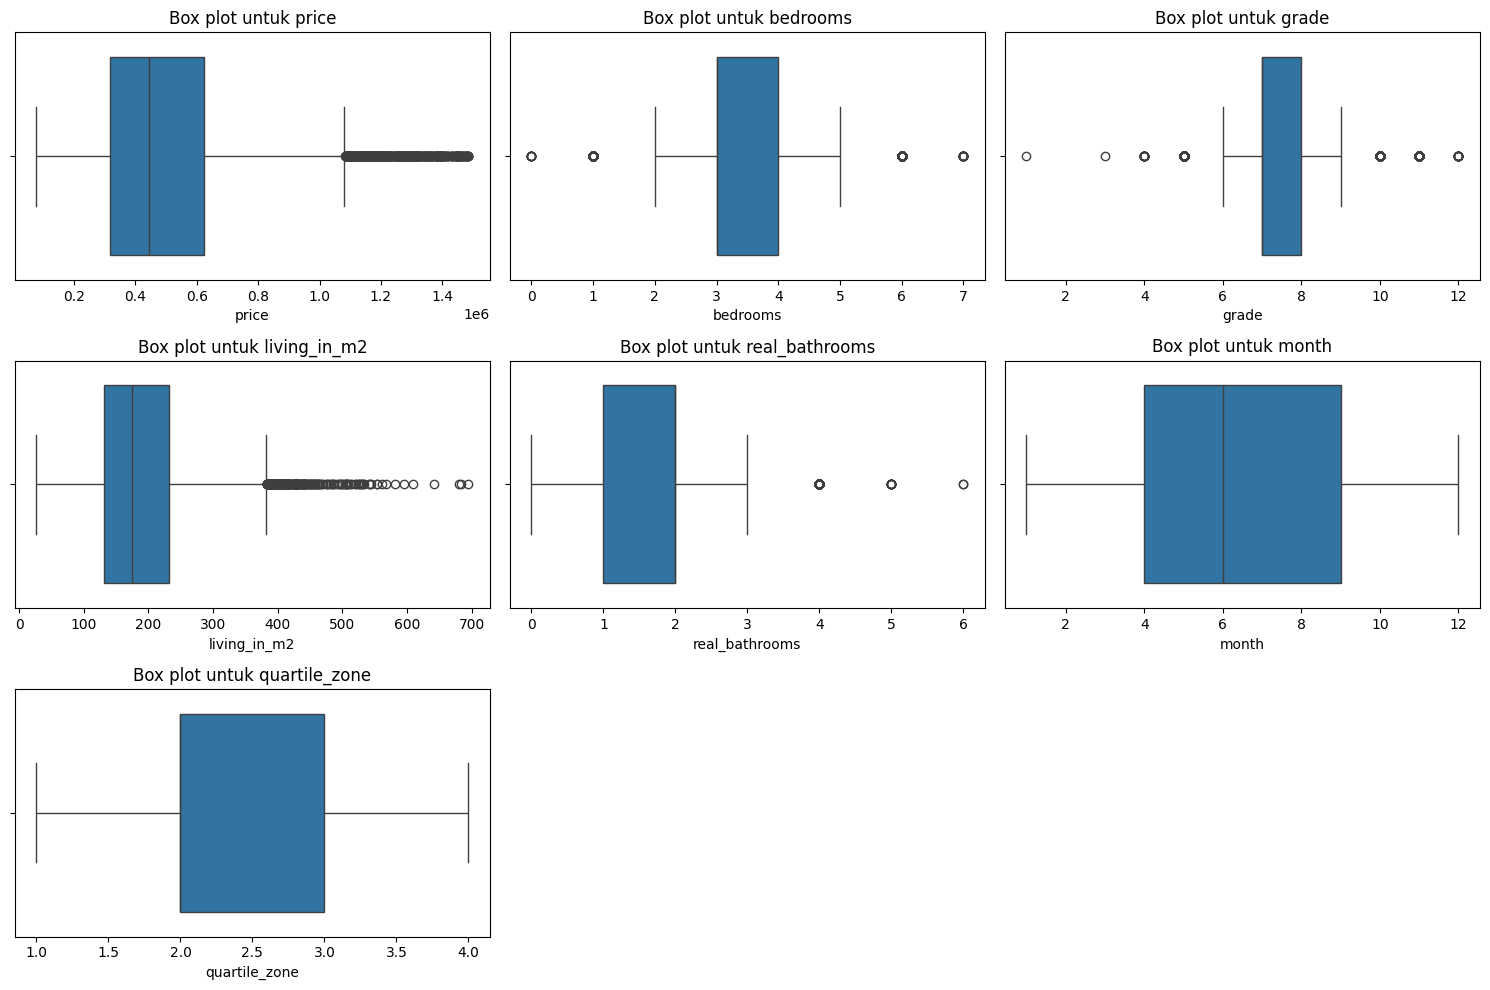

In [ ]:
#boxplot untuk mengetahui outlier

import matplotlib.pyplot as plt
import seaborn as sns

# membuat box plot untuk semua nilai kolom numerik dari df_train
numerical_features = df_train.select_dtypes(include=np.number).columns  # memunculkan kolom mana saja yang numerik

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, 1):  # iterasi
    plt.subplot(len(numerical_features) // 3 + 1, 3, i)
    sns.boxplot(x=df_train[feature])  # mengambil datadari df_train
    plt.title(f'Box plot untuk {feature}')
plt.tight_layout()
plt.show()

Box plot pada gambar ini menunjukkan persebaran data dan keberadaan outlier untuk masing-masing variabel. Berikut adalah interpretasi outlier pada tiap variabel berdasarkan box plot:

1. **Price (Harga)**
   - Terdapat banyak outlier pada bagian harga yang tinggi (kanan), yaitu data yang berada jauh di atas batas atas (upper whisker). Ini mengindikasikan properti dengan harga yang jauh lebih tinggi dari nilai normal yang dapat mempengaruhi analisis.

2. **Bedrooms (Jumlah Kamar Tidur)**
   - Outlier terlihat pada jumlah kamar tidur di atas nilai 5. Mayoritas properti memiliki antara 3 dan 4 kamar tidur, tetapi beberapa memiliki lebih banyak, hingga 7 kamar tidur, yang tergolong outlier.

3. **Grade (Kualitas Bangunan)**
   - Terdapat beberapa outlier untuk grade di atas nilai 9. Mayoritas nilai grade berada pada 7-8, namun terdapat beberapa properti dengan nilai grade hingga 12, yang menandakan kualitas sangat tinggi yang jarang ditemukan.

4. **Living Area in m² (Luas Bangunan dalam m²)**
   - Banyak outlier di bagian kanan, menunjukkan beberapa properti dengan luas bangunan yang sangat besar, lebih dari 400 m², sementara kebanyakan properti memiliki luas di sekitar 100–300 m².

5. **Real Bathrooms (Jumlah Kamar Mandi)**
   - Terdapat beberapa outlier pada jumlah kamar mandi di atas nilai 3, dengan jumlah maksimal 6 kamar mandi. Kebanyakan properti memiliki 1 atau 2 kamar mandi, sementara properti dengan jumlah kamar mandi tinggi bisa dianggap sebagai outlier.

6. **Month (Bulan)**
   - Tidak ada outlier yang terlihat untuk kolom month, menunjukkan bahwa data bulan terdistribusi dengan baik dalam rentang 1 hingga 12.

7. **Quartile Zone**
   - Tidak ada outlier yang terlihat untuk kolom quartile_zone, menandakan persebaran data dalam zona kuartil cukup merata.

**Kesimpulan**:

Variabel **price**, **bedrooms**, **grade**, **living_in_m2**, dan **real_bathrooms** memiliki outlier yang signifikan. Dalam konteks analisis data atau pemodelan, outlier ini perlu diperhatikan karena dapat mempengaruhi hasil dan interpretasi model. Kita mungkin mempertimbangkan untuk menangani outlier ini dengan metode seperti trimming, winsorizing, atau transformasi data jika diperlukan.

##Menangani Outlier

Penanganan outlier dengan metode IQR dilakukan pada tahap `Data Preprocessing` setelah baris kode Box-Plot.

Karena berdasarkan analisis sebelumnya ditemukan bahwa fitur bedrooms, grade, living_in_m2 dan real_bathrooms memiliki outlier yang signifikan maka hanya fitur-fitur ini saja yang harus diproses ulang menggunakan IQR.

In [ ]:
#Penanganan Outlier dengan IQR
numerical_features = ['bedrooms', 'grade', 'living_in_m2', 'real_bathrooms']

# Loop pada setiap fitur numerik
data_no_outliers = df_train.copy()  # Membuat salinan data awal

for feature in numerical_features:
    Q1 = data_no_outliers[feature].quantile(0.25)
    Q3 = data_no_outliers[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data_no_outliers = data_no_outliers[(data_no_outliers[feature] >= lower_bound) & (data_no_outliers[feature] <= upper_bound)]

# Cek jumlah data setelah outlier dihapus
print(f"Jumlah data sebelum menghapus outlier: {len(df_train)}") # Changed 'data' to 'df_train'
print(f"Jumlah data setelah menghapus outlier: {len(data_no_outliers)}")

Jumlah data sebelum menghapus outlier: 14105
Jumlah data setelah menghapus outlier: 12659


## Data Preprocessing

Prapemrosesan data adalah salah satu langkah terpenting dalam Machine Learning. Hal ini meliputi:

*   Mengonversi data non-numerik (misalnya, nilai Benar/Salah) menjadi nilai numerik.
*   Menskalakan fitur numerik sehingga semuanya berada pada skala yang sama, yang meningkatkan kinerja model.


In [ ]:
def preprocess_data(df):
    # boolean menjadi int
    df['has_basement'] = df['has_basement'].astype(int)
    df['renovated'] = df['renovated'].astype(int)
    df['nice_view'] = df['nice_view'].astype(int)
    df['perfect_condition'] = df['perfect_condition'].astype(int)
    df['has_lavatory'] = df['has_lavatory'].astype(int)
    df['single_floor'] = df['single_floor'].astype(int)

    # Select the features to use for prediction (independent variables)
    features = ['bedrooms', 'grade', 'has_basement', 'living_in_m2',
                'renovated', 'nice_view', 'perfect_condition', 'real_bathrooms',
                'has_lavatory', 'single_floor', 'month', 'quartile_zone']

    X = df[features]  # Independent variables
    y = df['price']  # Target variable (price)

    # Normalize the numerical features
    scaler = StandardScaler()
    X[['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])

    return X, y

# Preprocess the training and test data
X_train, y_train = preprocess_data(df_train)
X_test, y_test = preprocess_data(df_test)

<ipython-input-8-e02aecaeab51>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])
<ipython-input-8-e02aecaeab51>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])


Warning `SettingWithCopyWarning` terjadi karena kita mencoba mengubah bagian dari DataFrame yang mungkin merupakan "view" (referensi ke data asli) alih-alih "copy" (salinan terpisah). Ini bisa menyebabkan perubahan yang tidak diinginkan.



Pada kasus di atas, peringatan muncul ketika melakukan scaling dengan kode berikut:



`X[['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])`


Untuk mengatasinya gunakan:
Gunakan `.loc` agar pandas tahu bahwa kita ingin mengubah data secara langsung:

```
X.loc[:, ['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])

```
Catatan:

`X.loc[:]` adalah cara untuk mengakses atau memilih data dari sebuah *DataFrame* di Pandas berdasarkan label baris dan kolom. Berikut adalah penjelasan komponennya:

1. **`X`**: Ini adalah nama *DataFrame* yang ingin diakses.
2. **`loc[]`**: Ini adalah metode yang digunakan untuk memilih data berdasarkan label atau nama baris dan kolom. Berbeda dengan `iloc[]` yang berdasarkan indeks posisi, `loc[]` memilih data berdasarkan label atau indeks yang spesifik.
3. **`:`**: Dalam konteks ini, tanda titik dua (`:`) berarti "pilih semua baris". Ini adalah cara untuk memilih keseluruhan baris dalam *DataFrame*.
   
Secara lengkap, perintah ini:
- **`X.loc[:, ['living_in_m2', 'real_bathrooms']]`** berarti pilih semua baris (dengan `:`) dan kolom `['living_in_m2', 'real_bathrooms']`.
- Kemudian, **`scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])`** menerapkan *scaling* atau normalisasi pada dua kolom tersebut, lalu hasilnya ditimpa kembali ke *DataFrame* X pada kolom yang sama.

Dengan kata lain, kode ini memilih semua baris pada kolom `living_in_m2` dan `real_bathrooms`, menerapkan transformasi skala, dan menyimpannya kembali ke kolom tersebut.

In [ ]:
def preprocess_data(df):
    # boolean menjadi int
    df['has_basement'] = df['has_basement'].astype(int)
    df['renovated'] = df['renovated'].astype(int)
    df['nice_view'] = df['nice_view'].astype(int)
    df['perfect_condition'] = df['perfect_condition'].astype(int)
    df['has_lavatory'] = df['has_lavatory'].astype(int)
    df['single_floor'] = df['single_floor'].astype(int)


    features = ['bedrooms', 'grade', 'has_basement', 'living_in_m2',
                'renovated', 'nice_view', 'perfect_condition', 'real_bathrooms',
                'has_lavatory', 'single_floor', 'month', 'quartile_zone']

    X = df[features]  # Independent variables
    y = df['price']  # Target variable (price)

    # normalisasi fitur numerik
    scaler = StandardScaler()
    X.loc[:, ['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])

    return X, y

# Preprocess the training and test data
X_train, y_train = preprocess_data(df_train)
X_test, y_test = preprocess_data(df_test)

<ipython-input-9-7f790ac2a608>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.03185188  1.88542027  0.4267842  ... -1.03185188 -1.03185188
  0.4267842 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, ['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])
<ipython-input-9-7f790ac2a608>:20: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.03852263  1.83109567 -1.03852263 ... -1.03852263  1.83109567
  0.39628652]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X.loc[:, ['living_in_m2', 'real_bathrooms']] = scaler.fit_transform(X[['living_in_m2', 'real_bathrooms']])


Kode Perbaikan Error:

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

pd.options.mode.copy_on_write = True

def preprocess_data(df):
    #konversi tipe data boolean menjadi integer
    df['has_basement'] = df['has_basement'].astype(int)
    df['renovated'] = df['renovated'].astype(int)
    df['nice_view'] = df['nice_view'].astype(int)
    df['perfect_condition'] = df['perfect_condition'].astype(int)
    df['has_lavatory'] = df['has_lavatory'].astype(int)
    df['single_floor'] = df['single_floor'].astype(int)


    features = ['bedrooms', 'grade', 'has_basement', 'living_in_m2',
                'renovated', 'nice_view', 'perfect_condition', 'real_bathrooms',
                'has_lavatory', 'single_floor', 'month', 'quartile_zone']

    X = df[features]
    y = df['price']

    # konversi kolom yang relevan dengan int64 sebelum penyekalaan
    X.loc[:, 'living_in_m2'] = X['living_in_m2'].astype(np.int64)
    X.loc[:, 'real_bathrooms'] = X['real_bathrooms'].astype(np.int64)


     # normalisasi fitur numerik
    scaler = StandardScaler()
    X[['living_in_m2','real_bathrooms']] = scaler.fit_transform(X[['living_in_m2','real_bathrooms']])

    return X, y

# olah training dan test data
X_train, y_train = preprocess_data(df_train)
X_test, y_test = preprocess_data(df_test)


##Building the Model

In [ ]:
# Create a linear regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

##Making Predictions

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)


##Evaluating Model

Mengevaluasi model menggunakan empat kali pengecekan yaitu dengan model fit score, R2 Score, Mean Absolute Error dan Mean Square Error.

In [ ]:
modelku = model.fit(X_train, y_train)
modelku.score(X_test, y_test)

0.7754263499631886

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.7754263499631886


In [ ]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 0.1749596295023338
Mean Squared Error (MSE): 0.05052745091811713


Akurasi kinerja model berdasarkan model fit score adalah 77%, R-squared score adalah 77%, MAE adalah 17% dan MSE adalah 5%. Biasanya MSE > MAE, namun pada model kali ini MSE < MAE.

## Visualizing the Results

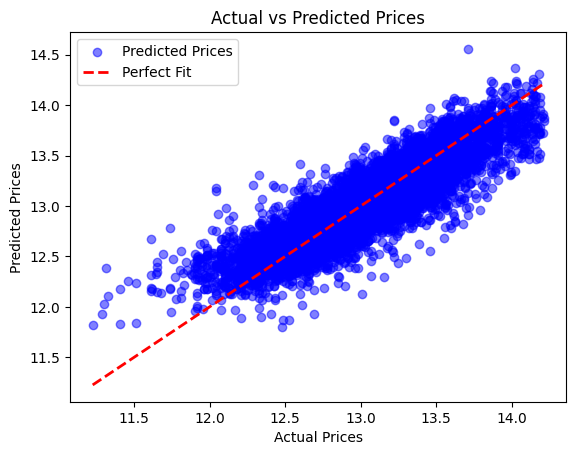

In [ ]:
# Plot actual vs predicted prices
plt.scatter(y_test, y_pred, color='blue', alpha=0.5, label='Predicted Prices')  # Set color and transparency
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')  # Add diagonal line

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()


#**Interpretasi Model Kedua**

-  Model regresi linier berganda ini menunjukkan kinerja yang baik dalam memprediksi harga setelah praproses data dengan menambahkan reduksi data outlier menggunakan estimator yang lebih robust yaitu IQR dan dilanjutkan dengan Standar Scaler, di mana jumlah data kemudian berkurang dari 14.105 menjadi 12.659 setelah penghapusan 1.446 data yang diidentifikasi sebagai outlier. Penghapusan outlier ini memungkinkan model untuk lebih fokus pada pola umum dalam data, mengurangi potensi bias akibat data ekstrem, dan menghasilkan prediksi yang lebih stabil dan akurat. Nilai R² sebesar 0,7754 menunjukkan bahwa model mampu menjelaskan sekitar 77,54% dari variasi harga aktual, artinya sebagian besar variabilitas harga dapat dijelaskan oleh variabel-variabel prediktor dalam model. Hal ini menunjukkan keandalan model dalam memprediksi harga secara akurat.

- Nilai Mean Absolute Error (MAE) sebesar 0,1750 mengindikasikan bahwa rata-rata kesalahan prediksi model hanya sebesar 0,175 unit dari harga aktual, menunjukkan tingkat kesalahan yang rendah dan menggambarkan akurasi model dalam konteks dunia nyata. Sementara itu, Mean Squared Error (MSE) sebesar 0,0505 menunjukkan bahwa rata-rata kesalahan kuadrat juga kecil, yang berarti tidak ada kesalahan besar yang menonjol dan model cukup konsisten dalam memberikan prediksi mendekati nilai aktual.

- Visualisasi scatter plot antara harga aktual (sumbu X) dan harga prediksi (sumbu Y) memperlihatkan rentang nilai dari 11,5 hingga 14,5 pada kedua sumbu, dengan sebagian besar titik data berkumpul di sekitar garis merah putus-putus, yang menunjukkan kesesuaian sempurna antara prediksi dan harga aktual. Kedekatan titik-titik prediksi (titik biru) dengan garis ini mengindikasikan akurasi model yang tinggi, terutama pada rentang antara 12 hingga 14, di mana titik-titik biru berkumpul lebih padat. Sebagian kecil titik yang menyimpang dari garis kesesuaian di ujung bawah (sekitar 11,5) dan ujung atas (sekitar 14,5) mungkin menunjukkan tantangan dalam memprediksi harga pada batas ekstrem data.

- Menariknya, MSE lebih kecil dari MAE, yang dapat dijelaskan oleh distribusi kesalahan yang kecil dan simetris, serta ketiadaan kesalahan besar yang dominan, sehingga pengkuadratan kesalahan tidak banyak memengaruhi nilai rata-rata. Dalam konteks ini, MSE yang lebih kecil dari MAE menunjukkan distribusi kesalahan yang seimbang, tanpa banyak kesalahan ekstrem, yang menandakan konsistensi dan keakuratan prediksi model pada sebagian besar data. Secara keseluruhan, nilai R², MAE, MSE, dan visualisasi menunjukkan bahwa model regresi linier berganda ini memiliki performa yang baik dalam memprediksi harga, meskipun ada potensi untuk peningkatan akurasi lebih lanjut pada rentang harga ekstrem.